In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cleaning import *
from refactoring import *
%matplotlib inline


In [2]:
data = pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
data = data.rename(columns=lambda x: x.strip())

In [4]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
variables_list = ['shares','timedelta','n_tokens_title', 'n_tokens_content','kw_avg_avg','n_unique_tokens','num_hrefs','num_imgs', 'num_videos', 'num_keywords', 
           'self_reference_avg_sharess','data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
           'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 
           'data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world', 'is_weekend',
           'rate_positive_words','rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity',
           'title_subjectivity','title_sentiment_polarity','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']

In [6]:
data = variables(data, variables_list)

In [7]:
data['log_shares'] = np.log(data['shares'])

In [8]:
X = data.drop(['shares','log_shares'], axis = 1)

In [9]:
y = data['log_shares']

In [10]:
linreg = LinearRegression()
model = linreg.fit(X,y)
model.score(X,y)

0.10657813845952602

In [11]:
import statsmodels.api as sm
import scipy.stats as stats

In [12]:
y_preds = model.predict(X)
residuals = y_preds - y
residuals

0        0.617658
1        0.443206
2       -0.316799
3       -0.302657
4        1.179344
           ...   
39639    0.060984
39640    0.173727
39641    0.251950
39642   -0.107633
39643   -0.087670
Name: log_shares, Length: 39644, dtype: float64

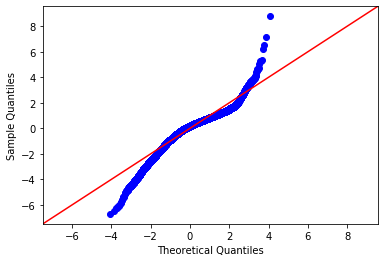

In [13]:
fig= sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [14]:
from statsmodels.formula.api import ols

In [15]:
outcome = 'log_shares'
predictors = '+'.join(X.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     157.5
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:00:43   Log-Likelihood:                -51162.
No. Observations:               39644   AIC:                         1.024e+05
Df Residuals:                   39613   BIC:                         1.027e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.3334      0.055    132.814      0.000       7.225       7.442
timedelta                      9.974e-05   2.27e-05      4.394      0.000    5.52e-05       0.000
n_tokens_title                    0.0053      0.002      2.394      0.017       0.001       0.010
n_tokens_content               4.373e-05   1.17e-05      3.729      0.000    2.07e-05    6.67e-05
kw_avg_avg                        0.0001   4.07e-06     26.442      0.000    9.96e-05       0.000
n_unique_tokens                   0.0012      0.001      0.975      0.329      -0.001       0.004
num_hrefs                         0.0038      0.000      8.243      0.000       0.003       0.005
num_imgs                          0.0029      0.001      4.616      0.000       0.002       0.004
num_videos                        0.0012      0.001      1.042      0.297      -0.001       0.004
num_keywords                      0.0139      0.002      5.660      0.000       0.009       0.019
self_reference_avg_sharess     1.818e-06   1.86e-07      9.770      0.000    1.45e-06    2.18e-06
data_channel_is_lifestyle        -0.1223      0.030     -4.132      0.000      -0.180      -0.064
data_channel_is_entertainment    -0.2893      0.018    -15.774      0.000      -0.325      -0.253
data_channel_is_bus              -0.2889      0.029    -10.044      0.000      -0.345      -0.233
global_sentiment_polarity         0.0664      0.123      0.541      0.588      -0.174       0.307
global_rate_positive_words       -1.2224      0.535     -2.283      0.022      -2.272      -0.173
global_rate_negative_words        2.3108      1.021      2.262      0.024       0.309       4.313
data_channel_is_socmed            0.0994      0.028      3.582      0.000       0.045       0.154
data_channel_is_tech              0.0074      0.028      0.264      0.792      -0.047       0.062
data_channel_is_world            -0.1494      0.028     -5.334      0.000      -0.204      -0.094
is_weekend                        0.2625      0.013     19.855      0.000       0.237       0.288
rate_positive_words              -0.1307      0.045     -2.876      0.004      -0.220      -0.042
rate_negative_words              -0.3339      0.072     -4.662      0.000      -0.474      -0.194
avg_positive_polarity            -0.0208      0.081     -0.256      0.798      -0.180       0.138
avg_negative_polarity            -0.2336      0.045     -5.181      0.000      -0.322      -0.145
title_subjectivity                0.0486      0.014      3.370      0.001       0.020       0.077
title_sentiment_polarity          0.0733      0.018      4.134      0.000       0.039       0.108
LDA_01                           -0.3285      0.040     -8.153      0.000      -0.407      -0.249
LDA_02                           -0.5415     

In [16]:
np.sum(np.abs(X.corr()) > 0.4)

timedelta                        1
n_tokens_title                   1
n_tokens_content                 2
kw_avg_avg                       2
n_unique_tokens                  1
num_hrefs                        2
num_imgs                         1
num_videos                       1
num_keywords                     1
self_reference_avg_sharess       1
data_channel_is_lifestyle        1
data_channel_is_entertainment    2
data_channel_is_bus              1
global_sentiment_polarity        6
global_rate_positive_words       3
global_rate_negative_words       3
data_channel_is_socmed           1
data_channel_is_tech             2
data_channel_is_world            2
is_weekend                       1
rate_positive_words              5
rate_negative_words              4
avg_positive_polarity            3
avg_negative_polarity            1
title_subjectivity               1
title_sentiment_polarity         1
LDA_01                           2
LDA_02                           2
LDA_03              

In [17]:
data_subset = X.drop('global_sentiment_polarity',axis= 1)

In [18]:
data_subset.drop('rate_positive_words',axis= 1, inplace= True)

In [19]:
np.sum(np.abs(data_subset.corr()) > 0.4)

timedelta                        1
n_tokens_title                   1
n_tokens_content                 2
kw_avg_avg                       2
n_unique_tokens                  1
num_hrefs                        2
num_imgs                         1
num_videos                       1
num_keywords                     1
self_reference_avg_sharess       1
data_channel_is_lifestyle        1
data_channel_is_entertainment    2
data_channel_is_bus              1
global_rate_positive_words       1
global_rate_negative_words       2
data_channel_is_socmed           1
data_channel_is_tech             2
data_channel_is_world            2
is_weekend                       1
rate_negative_words              2
avg_positive_polarity            1
avg_negative_polarity            1
title_subjectivity               1
title_sentiment_polarity         1
LDA_01                           2
LDA_02                           2
LDA_03                           2
LDA_04                           2
dtype: int64

In [20]:
outcome = 'log_shares'
predictors = '+'.join(data_subset.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pd.concat([data_subset,y],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     168.4
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:00:47   Log-Likelihood:                -51166.
No. Observations:               39644   AIC:                         1.024e+05
Df Residuals:                   39615   BIC:                         1.026e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.2879      0.053    137.778      0.000       7.184       7.392
timedelta                      9.436e-05   2.26e-05      4.170      0.000       5e-05       0.000
n_tokens_title                    0.0051      0.002      2.335      0.020       0.001       0.009
n_tokens_content               4.354e-05   1.17e-05      3.715      0.000    2.06e-05    6.65e-05
kw_avg_avg                        0.0001   4.06e-06     26.618      0.000       0.000       0.000
n_unique_tokens                   0.0012      0.001      0.983      0.326      -0.001       0.004
num_hrefs                         0.0038      0.000      8.101      0.000       0.003       0.005
num_imgs                          0.0029      0.001      4.611      0.000       0.002       0.004
num_videos                        0.0012      0.001      1.024      0.306      -0.001       0.004
num_keywords                      0.0142      0.002      5.802      0.000       0.009       0.019
self_reference_avg_sharess     1.793e-06   1.86e-07      9.643      0.000    1.43e-06    2.16e-06
data_channel_is_lifestyle        -0.1243      0.030     -4.200      0.000      -0.182      -0.066
data_channel_is_entertainment    -0.2939      0.018    -16.078      0.000      -0.330      -0.258
data_channel_is_bus              -0.2945      0.029    -10.264      0.000      -0.351      -0.238
global_rate_positive_words       -1.8792      0.401     -4.682      0.000      -2.666      -1.092
global_rate_negative_words        3.3112      0.887      3.734      0.000       1.573       5.049
data_channel_is_socmed            0.0951      0.028      3.432      0.001       0.041       0.149
data_channel_is_tech              0.0020      0.028      0.071      0.943      -0.053       0.057
data_channel_is_world            -0.1541      0.028     -5.513      0.000      -0.209      -0.099
is_weekend                        0.2639      0.013     19.972      0.000       0.238       0.290
rate_negative_words              -0.3421      0.068     -5.038      0.000      -0.475      -0.209
avg_positive_polarity            -0.0621      0.049     -1.259      0.208      -0.159       0.035
avg_negative_polarity            -0.2071      0.040     -5.192      0.000      -0.285      -0.129
title_subjectivity                0.0512      0.014      3.558      0.000       0.023       0.079
title_sentiment_polarity          0.0753      0.018      4.268      0.000       0.041       0.110
LDA_01                           -0.3269      0.040     -8.115      0.000      -0.406      -0.248
LDA_02                           -0.5425      0.038    -14.236      0.000      -0.617      -0.468
LDA_03                           -0.2346      0.038     -6.165      0.000      -0.309      -0.160
LDA_04                           -0.2267     

In [21]:
high_p_vals = ['n_unique_tokens', 'num_videos', 'data_channel_is_tech', 'avg_positive_polarity']
data_subset.drop(high_p_vals, axis = 1, inplace = True)

In [22]:
outcome = 'log_shares'
predictors = '+'.join(data_subset.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pd.concat([data_subset,y],axis = 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     196.4
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:00:49   Log-Likelihood:                -51168.
No. Observations:               39644   AIC:                         1.024e+05
Df Residuals:                   39619   BIC:                         1.026e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.2814      0.049    149.452      0.000       7.186       7.377
timedelta                      9.325e-05   2.26e-05      4.130      0.000     4.9e-05       0.000
n_tokens_title                    0.0052      0.002      2.385      0.017       0.001       0.010
n_tokens_content               4.514e-05   1.16e-05      3.906      0.000    2.25e-05    6.78e-05
kw_avg_avg                        0.0001   4.04e-06     26.800      0.000       0.000       0.000
num_hrefs                         0.0037      0.000      8.134      0.000       0.003       0.005
num_imgs                          0.0028      0.001      4.487      0.000       0.002       0.004
num_keywords                      0.0141      0.002      5.763      0.000       0.009       0.019
self_reference_avg_sharess     1.793e-06   1.86e-07      9.650      0.000    1.43e-06    2.16e-06
data_channel_is_lifestyle        -0.1273      0.021     -5.966      0.000      -0.169      -0.085
data_channel_is_entertainment    -0.2931      0.017    -17.445      0.000      -0.326      -0.260
data_channel_is_bus              -0.2965      0.023    -12.956      0.000      -0.341      -0.252
global_rate_positive_words       -2.0716      0.374     -5.542      0.000      -2.804      -1.339
global_rate_negative_words        3.6193      0.863      4.192      0.000       1.927       5.312
data_channel_is_socmed            0.0942      0.023      4.103      0.000       0.049       0.139
data_channel_is_world            -0.1548      0.022     -7.139      0.000      -0.197      -0.112
is_weekend                        0.2635      0.013     19.951      0.000       0.238       0.289
rate_negative_words              -0.3697      0.065     -5.670      0.000      -0.498      -0.242
avg_negative_polarity            -0.2023      0.040     -5.110      0.000      -0.280      -0.125
title_subjectivity                0.0514      0.014      3.573      0.000       0.023       0.080
title_sentiment_polarity          0.0743      0.018      4.223      0.000       0.040       0.109
LDA_01                           -0.3300      0.038     -8.645      0.000      -0.405      -0.255
LDA_02                           -0.5430      0.038    -14.253      0.000      -0.618      -0.468
LDA_03                           -0.2340      0.034     -6.866      0.000      -0.301      -0.167
LDA_04                           -0.2273      0.033     -6.915      0.000      -0.292      -0.163
==============================================================================
Omnibus:                     7168.453   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19466.596
Skew:                           0.978   Prob(JB):                         0.00
Kurtosis:              

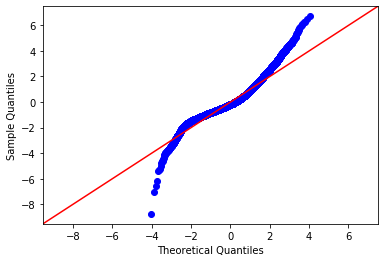

In [23]:
fig = sm.graphics.qqplot(model.resid, dist= stats.norm, line='45', fit=True)

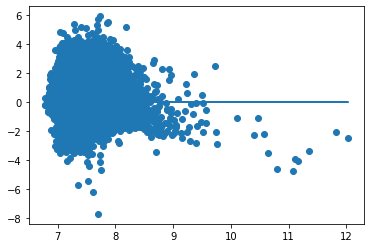

In [24]:
plt.scatter(model.predict(data_subset), model.resid)
plt.plot(model.predict(data_subset), [0 for i in range(len(data))])

In [25]:
for i in range(80, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, data['shares'].quantile(q=q)))

for i in range(1,20):
    q = i/100
    print('{} percentile: {}'.format(q, data['shares'].quantile(q=q)))

0.8 percentile: 3400.0
0.81 percentile: 3600.0
0.82 percentile: 3700.0
0.83 percentile: 3900.0
0.84 percentile: 4100.0
0.85 percentile: 4400.0
0.86 percentile: 4700.0
0.87 percentile: 5000.0
0.88 percentile: 5300.0
0.89 percentile: 5700.0
0.9 percentile: 6200.0
0.91 percentile: 6700.0
0.92 percentile: 7500.0
0.93 percentile: 8300.0
0.94 percentile: 9400.0
0.95 percentile: 10800.0
0.96 percentile: 12700.0
0.97 percentile: 15700.0
0.98 percentile: 20500.0
0.01 percentile: 381.0
0.02 percentile: 463.0
0.03 percentile: 513.29
0.04 percentile: 551.0
0.05 percentile: 584.0
0.06 percentile: 613.0
0.07 percentile: 641.0100000000002
0.08 percentile: 666.0
0.09 percentile: 689.0
0.1 percentile: 708.0
0.11 percentile: 725.0
0.12 percentile: 743.0
0.13 percentile: 759.0
0.14 percentile: 777.0
0.15 percentile: 792.0
0.16 percentile: 809.0
0.17 percentile: 824.0
0.18 percentile: 840.0
0.19 percentile: 855.0


In [26]:
lower_cutoff = 600
upper_cutoff = 5500
new_data = pd.concat([data_subset, data['shares'],data['log_shares']], axis=1)
new_data = new_data[(new_data['shares'] > lower_cutoff) & (new_data['shares'] < upper_cutoff)]
data_subset = new_data.drop(['shares', 'log_shares'], axis = 1)
y = new_data['log_shares']

In [27]:
data_subset

,timedelta,n_tokens_title,n_tokens_content,kw_avg_avg,num_hrefs,num_imgs,num_keywords,self_reference_avg_sharess,data_channel_is_lifestyle,data_channel_is_entertainment,...,data_channel_is_world,is_weekend,rate_negative_words,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,LDA_01,LDA_02,LDA_03,LDA_04
1,731.0,9.0,255.0,0.000000,3.0,1.0,4.0,0.000000,0.0,0.0,...,0.0,0.0,0.266667,-0.118750,0.000000,0.000000,0.050047,0.050096,0.050101,0.050001
2,731.0,9.0,211.0,0.000000,3.0,1.0,6.0,918.000000,0.0,0.0,...,0.0,0.0,0.142857,-0.466667,0.000000,0.000000,0.033334,0.033351,0.033334,0.682188
3,731.0,9.0,531.0,0.000000,9.0,1.0,7.0,0.000000,0.0,1.0,...,0.0,0.0,0.333333,-0.369697,0.000000,0.000000,0.419300,0.494651,0.028905,0.028572
5,731.0,10.0,370.0,0.000000,2.0,0.0,9.0,8500.000000,0.0,0.0,...,0.0,0.0,0.476190,-0.195000,0.642857,0.214286,0.306718,0.022231,0.022224,0.626582
7,731.0,12.0,989.0,0.000000,20.0,20.0,9.0,3151.157895,0.0,0.0,...,0.0,0.0,0.153061,-0.242778,1.000000,0.500000,0.150733,0.243435,0.022224,0.561384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,3031.115764,9.0,1.0,8.0,37033.333333,0.0,0.0,...,0.0,0.0,0.277778,-0.260000,0.100000,0.000000,0.025001,0.151701,0.025000,0.773260
39640,8.0,12.0,328.0,3411.660830,9.0,3.0,7.0,2100.000000,0.0,0.0,...,0.0,0.0,0.187500,-0.211111,0.300000,1.000000,0.028575,0.231866,0.681635,0.028575
39641,8.0,10.0,442.0,4206.439195,24.0,12.0,8.0,1400.000000,0.0,0.0,...,0.0,0.0,0.423077,-0.356439,0.454545,0.136364,0.025025,0.025207,0.643794,0.146970
39642,8.0,6.0,682.0,1777.895883,10.0,1.0,5.0,452.000000,0.0,0.0,...,1.0,0.0,0.533333,-0.205246,0.000000,0.000000,0.040003,0.839987,0.040002,0.040004


In [28]:
outcome = 'log_shares'
predictors = '+'.join(data_subset.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pd.concat([data_subset,y],axis = 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     160.1
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:00:55   Log-Likelihood:                -24742.
No. Observations:               32798   AIC:                         4.953e+04
Df Residuals:                   32773   BIC:                         4.974e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.3389      0.032    232.039      0.000       7.277       7.401
timedelta                      9.837e-05   1.45e-05      6.777      0.000    6.99e-05       0.000
n_tokens_title                   -0.0026      0.001     -1.848      0.065      -0.005       0.000
n_tokens_content               6.431e-05   7.55e-06      8.523      0.000    4.95e-05    7.91e-05
kw_avg_avg                      5.17e-05   2.83e-06     18.278      0.000    4.62e-05    5.72e-05
num_hrefs                         0.0010      0.000      3.203      0.001       0.000       0.002
num_imgs                          0.0002      0.000      0.396      0.692      -0.001       0.001
num_keywords                      0.0094      0.002      5.984      0.000       0.006       0.012
self_reference_avg_sharess     5.921e-07    1.2e-07      4.949      0.000    3.58e-07    8.27e-07
data_channel_is_lifestyle        -0.0939      0.014     -6.765      0.000      -0.121      -0.067
data_channel_is_entertainment    -0.1579      0.011    -14.299      0.000      -0.180      -0.136
data_channel_is_bus              -0.1793      0.015    -12.219      0.000      -0.208      -0.151
global_rate_positive_words       -0.9437      0.244     -3.871      0.000      -1.422      -0.466
global_rate_negative_words        2.1291      0.566      3.762      0.000       1.020       3.238
data_channel_is_socmed            0.1317      0.015      8.964      0.000       0.103       0.160
data_channel_is_world            -0.1227      0.014     -8.799      0.000      -0.150      -0.095
is_weekend                        0.2189      0.008     25.942      0.000       0.202       0.235
rate_negative_words              -0.2384      0.043     -5.594      0.000      -0.322      -0.155
avg_negative_polarity            -0.0394      0.026     -1.539      0.124      -0.090       0.011
title_subjectivity                0.0197      0.009      2.111      0.035       0.001       0.038
title_sentiment_polarity          0.0294      0.012      2.551      0.011       0.007       0.052
LDA_01                           -0.3179      0.025    -12.896      0.000      -0.366      -0.270
LDA_02                           -0.3318      0.024    -13.624      0.000      -0.379      -0.284
LDA_03                           -0.2873      0.022    -13.038      0.000      -0.330      -0.244
LDA_04                           -0.1469      0.021     -6.963      0.000      -0.188      -0.106
==============================================================================
Omnibus:                     1593.435   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1666.524
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:              

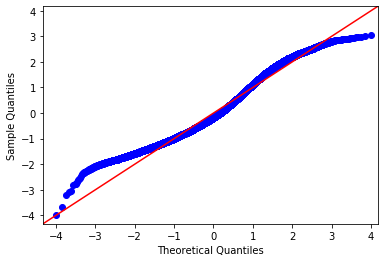

In [29]:
fig = sm.graphics.qqplot(model.resid, dist= stats.norm, line='45', fit=True)

In [30]:
to_drop = ['n_tokens_title', 'num_imgs', 'avg_negative_polarity']
data_subset.drop(to_drop, axis= 1, inplace= True)

In [31]:
outcome = 'log_shares'
predictors = '+'.join(data_subset.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pd.concat([data_subset,y],axis = 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:01:02   Log-Likelihood:                -24745.
No. Observations:               32798   AIC:                         4.953e+04
Df Residuals:                   32776   BIC:                         4.972e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.3131      0.028    262.919      0.000       7.259       7.368
timedelta                         0.0001   1.42e-05      7.319      0.000     7.6e-05       0.000
n_tokens_content               6.531e-05   7.15e-06      9.139      0.000    5.13e-05    7.93e-05
kw_avg_avg                       5.2e-05   2.82e-06     18.410      0.000    4.65e-05    5.75e-05
num_hrefs                         0.0011      0.000      3.544      0.000       0.000       0.002
num_keywords                      0.0093      0.002      5.927      0.000       0.006       0.012
self_reference_avg_sharess     5.957e-07    1.2e-07      4.981      0.000    3.61e-07     8.3e-07
data_channel_is_lifestyle        -0.0928      0.014     -6.691      0.000      -0.120      -0.066
data_channel_is_entertainment    -0.1593      0.011    -14.485      0.000      -0.181      -0.138
data_channel_is_bus              -0.1808      0.015    -12.335      0.000      -0.210      -0.152
global_rate_positive_words       -0.8571      0.236     -3.635      0.000      -1.319      -0.395
global_rate_negative_words        2.0625      0.564      3.655      0.000       0.957       3.168
data_channel_is_socmed            0.1322      0.015      9.004      0.000       0.103       0.161
data_channel_is_world            -0.1232      0.014     -8.858      0.000      -0.150      -0.096
is_weekend                        0.2191      0.008     25.971      0.000       0.203       0.236
rate_negative_words              -0.2216      0.041     -5.384      0.000      -0.302      -0.141
title_subjectivity                0.0192      0.009      2.058      0.040       0.001       0.037
title_sentiment_polarity          0.0281      0.011      2.448      0.014       0.006       0.051
LDA_01                           -0.3171      0.025    -12.914      0.000      -0.365      -0.269
LDA_02                           -0.3335      0.024    -13.714      0.000      -0.381      -0.286
LDA_03                           -0.2866      0.022    -13.125      0.000      -0.329      -0.244
LDA_04                           -0.1488      0.021     -7.063      0.000      -0.190      -0.107
==============================================================================
Omnibus:                     1593.207   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1665.632
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:                       2.636   Cond. No.                     5.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+06. This might 

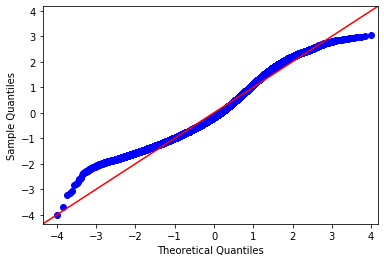

In [32]:
fig = sm.graphics.qqplot(model.resid, dist= stats.norm, line='45', fit=True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_subset, y, test_size = 0.25, random_state= 42)

In [34]:
compare_poly(X_train, X_test, y_train, y_test, degrees = 2)

Training R^2 : 0.14410712519383706
Training Root Mean Square Error 0.5031085579046173

----------------

Testing R^2 : 0.1260695027206944
Testing Root Mean Square Error 0.5084242220551513


In [ ]:
compare_poly(X_train, X_test, y_train, y_test, degrees = 5)

Training R^2 : 0.14410712519383706
Training Root Mean Square Error 0.5031085579046173

----------------

Testing R^2 : 0.1260695027206944
Testing Root Mean Square Error 0.5084242220551513
Training R^2 : 0.15930536946805451
Training Root Mean Square Error 0.49862165526160157

----------------

Testing R^2 : -0.3138902435153197
Testing Root Mean Square Error 0.6234007624765373


In [ ]:
x_cols = [col for col in df.columns if col != 'shares']

In [ ]:
x_cols

In [18]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,2.484907,5.389072,-0.410084,-7.692000e-09,-0.204095,1.386294,0.000000,-inf,1.543376,1.609438,...,-2.302585,-0.356675,NaN,NaN,NaN,-0.693147,NaN,-inf,-1.673976,593
1,2.197225,5.541264,-0.502952,-6.711000e-09,-0.233262,1.098612,0.000000,-inf,1.592032,1.386294,...,-3.401197,-0.356675,NaN,NaN,NaN,-inf,-inf,-0.693147,-inf,711
2,2.197225,5.351858,-0.553160,-8.403000e-09,-0.409676,1.098612,0.000000,-inf,1.480095,1.791759,...,-2.302585,0.000000,NaN,NaN,NaN,-inf,-inf,-0.693147,-inf,1500
3,2.197225,6.274762,-0.685600,-3.096000e-09,-0.407014,2.197225,0.000000,-inf,1.482717,1.945910,...,-1.992430,-0.223144,NaN,NaN,NaN,-inf,-inf,-0.693147,-inf,1200
4,2.564949,6.977281,-0.877922,-1.435000e-09,-0.614540,2.944439,2.995732,-inf,1.543904,1.945910,...,-3.401197,0.000000,NaN,NaN,NaN,-0.788457,-1.99243,-3.091042,-1.992430,505


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linreg = LinearRegression()
X = df[x_cols]
y = df['shares']

In [27]:
model = linreg.fit(X,y)


<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [30]:
model.score(X,y)

0.013505789169179327

In [31]:
y_hat = model.predict(X)

In [32]:
resid = y - y_hat

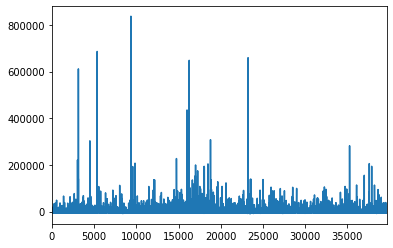

In [34]:
resid.plot()

In [37]:
from sklearn.linear_model import Lasso, LassoLarsIC

In [37]:
lasso = Lasso()
model = lasso.fit(X,y)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2048108456577.1255, tolerance: 535917795.22778714
  positive)


In [38]:
model.score(X,y)

0.013345042008881314

In [39]:
y_hat = model.predict(X)

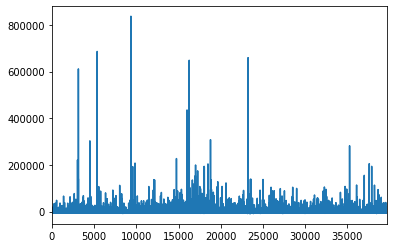

In [40]:
resid = y - y_hat
resid.plot()

In [42]:
lasso_ic = LassoLarsIC()

In [43]:
model = lasso_ic.fit(X,y)

In [44]:
model.score(X,y)

0.013075050589792636

In [45]:
from sklearn.linear_model import LassoLarsCV

In [46]:
lasso_cv = LassoLarsCV()

In [47]:
model = lasso_cv.fit(X,y)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [48]:
model.score(X,y)

0.012025097700922416

In [49]:
model.coef_

array([ 4.80598886e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.81389853e+01,  1.95331857e+01,  1.84051189e+01,
       -2.94161578e+02,  5.58090262e+01, -9.13008353e+02, -1.82365961e+03,
       -1.30963045e+03, -8.33713775e+02, -1.43759126e+03, -2.23342633e+03,
        2.12396946e+02,  0.00000000e+00,  0.00000000e+00, -1.04283375e-01,
        0.00000000e+00,  3.20567464e+02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.12545513e+03,  0.00000000e+00, -1.48089166e+02,  0.00000000e+00,
        0.00000000e+00,  2.50076595e+02,  5.65740305e+02])